# Making Business Decisions Based on Data Project

## Context
You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

## Step 1. Prioritizing Hypotheses

In [41]:
#load libraries

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
import warnings; warnings.simplefilter('ignore')


from functools import reduce
from math import factorial
from scipy import stats as st
from statistics import mean 
from IPython.display import display


pd.set_option('display.max_columns', 500)

In [42]:
hypotheses = pd.read_csv('/datasets/hypotheses_us.csv',delimiter=';')
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1
5,Add a customer review page. This will increase...,3,2,2,3
6,Show banners with current offers and sales on ...,5,3,8,3
7,Add a subscription form to all the main pages....,10,7,8,5
8,Launch a promotion that gives users discounts ...,1,9,9,5


To try to priotirize hypothesis let's first try ICE score.

In [43]:
hypotheses['ICE'] = hypotheses.Impact * hypotheses.Confidence / hypotheses.Effort
hypotheses.sort_values('ICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000
5,Add a customer review page. This will increase...,3,2,2,3,1.333333
3,Change the category structure. This will incre...,8,3,3,8,1.125000
4,Change the background color on the main page. ...,3,1,1,1,1.000000


According to ICE I should prioritize hypothesis 8, but this method doesn't include reach in it. Let's apply RICE, which includes reach in it.

In [44]:
hypotheses['RICE'] =hypotheses.Reach * hypotheses.Impact * hypotheses.Confidence / hypotheses.Effort
hypotheses.sort_values('RICE', ascending=False)

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0


After adding reach to the equasion I got really different result. Despite that fact that it takes more effort to test hypothesis number 7 and it will have fewer impact on users it applies to, it's better to select this hypothesis over 8, because it will reach higher amount of users. Hypothesis 8 has rank 1 for reach parameter, while hypothesis 7 has the highest reach of all and therefore will affect the highest amount of users. All said I really think that we should test hypothesis 7.


In [45]:
print ('Hypothesis for testing:', hypotheses['Hypothesis'][7])

Hypothesis for testing: Add a subscription form to all the main pages. This will help you compile a mailing list


## Part 2. A/B Test Analysis


You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.

In [46]:
orders = pd.read_csv('/datasets/orders_us.csv')
visits = pd.read_csv('/datasets/visits_us.csv')

In [47]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [48]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [49]:
visits.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [50]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In [51]:
#change data types
orders['date']= pd.to_datetime(orders['date'], format="%Y-%m-%d")
visits['date']= pd.to_datetime(visits['date'], format="%Y-%m-%d")

In [52]:
orders.describe(include='all')

,transactionId,visitorId,date,revenue,group
count,1.197000e+03,1.197000e+03,1197,1197.000000,1197
unique,NaN,NaN,31,NaN,2
top,NaN,NaN,2019-08-05 00:00:00,NaN,B
freq,NaN,NaN,48,NaN,640
first,NaN,NaN,2019-08-01 00:00:00,NaN,NaN
last,NaN,NaN,2019-08-31 00:00:00,NaN,NaN
mean,2.155621e+09,2.165960e+09,NaN,131.491646,NaN
std,1.229085e+09,1.236014e+09,NaN,603.004729,NaN
min,1.062393e+06,5.114589e+06,NaN,5.000000,NaN
25%,1.166776e+09,1.111826e+09,NaN,20.800000,NaN


Looks like data here has been collected for one month - August 2019, and average revenue per transaction has been $131. 
Now let's check data for sanity, let's see if all users stayed in one group for whole time of the test.

In [53]:
orders.groupby('visitorId').agg({'group':'nunique'}).group.value_counts()

1    973
2     58
Name: group, dtype: int64

So we have 58 users who have appeared both in group A and in group B.

In [54]:
print ('Percentage of users appearing in both A and B groups: {:.2%}'.format(
    orders.groupby('visitorId')['group'].nunique().value_counts()[2] / len(orders.visitorId.unique())))

Percentage of users appearing in both A and B groups: 5.63%


In [55]:
len(orders)

1197

It is reather high percentage, but nonetheless I'm going to have to drop it because it will deffinatly affect futher analysis.

In [56]:
orders = orders.groupby('visitorId').filter(lambda x: x['group'].nunique()<2)
orders.shape

(1016, 5)

With that out of the way now I will check how many values there are in each group.

In [57]:
orders.group.value_counts()

B    548
A    468
Name: group, dtype: int64

In [58]:
visits.group.value_counts()

A    31
B    31
Name: group, dtype: int64

There are more orders from group B. I should keep it in mind, when I will be doing analysis in absolute value. Also I'm gonna make numbers even when I get to testing hypothesis.

### Graph cumulative revenue by group. Make conclusions and conjectures.


First step here is to create an agregative table for amount of orders made by each group on each day. But I'm going to work with sums so to make it even I'll have to delete some random enteries from group B to make them the same length).

In [59]:
orders_ = pd.concat([orders.query('group =="B"').sample(len(orders.query('group=="A"'))), orders.query('group=="A"')])

In [60]:
datesGroups = orders_[['date','group']].drop_duplicates().sort_values('date')
ordersagg = (datesGroups
                    .apply(lambda x: orders_[np.logical_and(orders_['date'] <= x['date'], orders_['group'] == x['group'])]
                           .agg({'date' : 'max', 
                                 'group' : 'max', 
                                 'transactionId' : pd.Series.nunique, 
                                 'visitorId' : pd.Series.nunique, 
                                 'revenue' : 'sum'}), axis=1)
                    .sort_values(by=['date','group'])
                   )

ordersagg

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,2266.6
140,2019-08-01,B,14,14,770.9
175,2019-08-02,A,42,36,3734.9
216,2019-08-02,B,34,33,3038.2
291,2019-08-03,A,66,60,5550.1
...,...,...,...,...,...
689,2019-08-29,B,435,421,66737.8
757,2019-08-30,A,460,437,52363.7
866,2019-08-30,B,454,440,68764.1
958,2019-08-31,A,468,445,53212.0


Now let's add info about amount of visits for each day to the table.

In [61]:
visits_a = visits.query('group=="A"')
visits_a['cumulative_visits'] = visits_a.visits.cumsum()
visits_b = visits.query('group=="B"')
visits_b['cumulative_visits'] = visits_b.visits.cumsum()
visits_ = pd.concat([visits_a, visits_b]).sort_values(by=['date','group'])
visits_

,date,group,visits,cumulative_visits
0,2019-08-01,A,719,719
31,2019-08-01,B,713,713
1,2019-08-02,A,619,1338
32,2019-08-02,B,581,1294
2,2019-08-03,A,507,1845
...,...,...,...,...
59,2019-08-29,B,531,17708
29,2019-08-30,A,490,18037
60,2019-08-30,B,490,18198
30,2019-08-31,A,699,18736


In [62]:
cumulativedata = ordersagg.merge(visits_[['date','group','cumulative_visits']],
                                 left_on=['date', 'group'], right_on=['date', 'group'])
cumulativedata.columns = ['date','group','orders','buyers','revenue','visits']
cumulativedata

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,14,14,770.9,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,34,33,3038.2,1294
4,2019-08-03,A,66,60,5550.1,1845
...,...,...,...,...,...,...
57,2019-08-29,B,435,421,66737.8,17708
58,2019-08-30,A,460,437,52363.7,18037
59,2019-08-30,B,454,440,68764.1,18198
60,2019-08-31,A,468,445,53212.0,18736


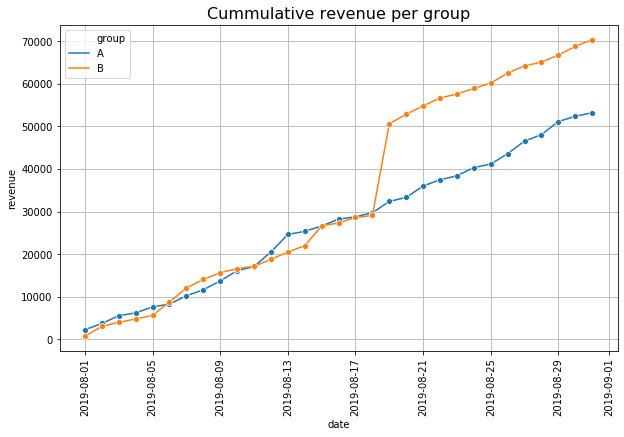

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Cummulative revenue per group',fontsize=16)
plt.xticks(rotation=90)
sns.lineplot(x="date", y="revenue", hue="group", data=cumulativedata, marker="o", ax=ax)
plt.grid()

It looks like revenue from both groups was going "back to back" before some strange and wild increase within group B. Maybe someone has made one big order. I should check it later to find if it's due to some outlier (I'm almost certain that it is).

### Graph cumulative average order size by group. Make conclusions and conjectures.


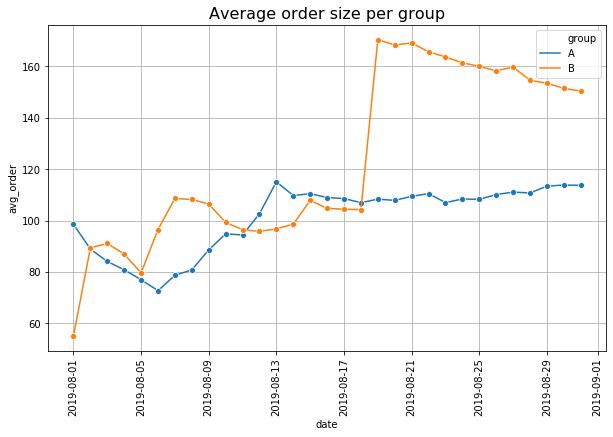

In [64]:
cumulativedata['avg_order'] = cumulativedata['revenue'] / cumulativedata['orders']
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average order size per group',fontsize=16)
plt.xticks(rotation=90)
sns.lineplot(x="date", y="avg_order", hue="group", data=cumulativedata, marker="o", ax=ax)
plt.grid()

Data fluctuates a lot, we see this hign peak in average order size from group B around August, 18-19th , but then it starts to decline. Let's look at it in comparisment to group A.

In [65]:
cumulative_avg_order = (cumulativedata
                        .pivot_table(index='date', columns='group',values='avg_order')
                        .reset_index()
                       )
cumulative_avg_order.columns = ['date', 'avg_orderA', 'avg_orderB']
cumulative_avg_order.head()

,date,avg_orderA,avg_orderB
0,2019-08-01,98.547826,55.064286
1,2019-08-02,88.926190,89.358824
2,2019-08-03,84.092424,91.090909
3,2019-08-04,80.851948,86.969091
4,2019-08-05,77.006061,79.653521


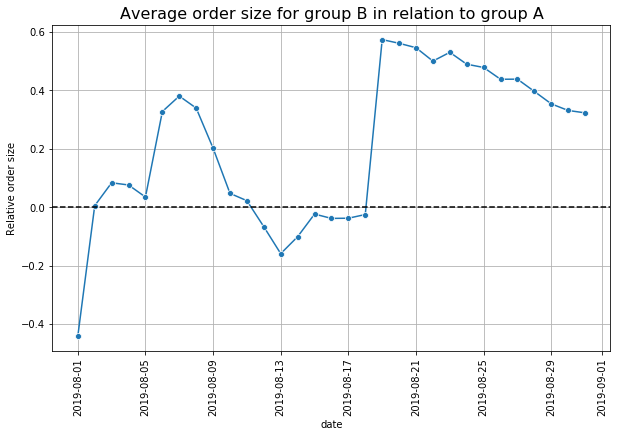

In [66]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Average order size for group B in relation to group A',fontsize=16)
plt.ylabel('Relative order size')
plt.xticks(rotation=90)
sns.lineplot(x="date", y=(cumulative_avg_order['avg_orderB'] / cumulative_avg_order['avg_orderA'] -1),
             data=cumulative_avg_order, marker="o", ax=ax)
plt.axhline(y=0, color='black', linestyle='--') 
plt.grid()

Here We can see that despite that peak in group B it has been going close to group A. After that rise of average order size its average order size has been declining mostly to the fact that most of the orders after that have stayed at much smaller size. We'll have to revisit it later while checking data without outliers.

### Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.


Here I'm going to have to make a table that contains not cumulative data, but data for each date. That way I will be able to calculate conversion for each day.

In [67]:
dayly_orders = (orders_
                .groupby(['date','group'])
                .agg({'transactionId':'nunique','visitorId':'nunique', 'revenue':'sum'})
                .reset_index()
                .sort_values(by=['date','group'])
               )
dayly_orders = dayly_orders.merge(visits, left_on=['date', 'group'], right_on=['date', 'group'])
dayly_orders.columns = ['date','group','orders','buyers','revenue','visits']
dayly_orders['conv_rate'] = dayly_orders.orders / dayly_orders.visits
dayly_orders

,date,group,orders,buyers,revenue,visits,conv_rate
0,2019-08-01,A,23,19,2266.6,719,0.031989
1,2019-08-01,B,14,14,770.9,713,0.019635
2,2019-08-02,A,19,18,1468.3,619,0.030695
3,2019-08-02,B,20,19,2267.3,581,0.034423
4,2019-08-03,A,24,24,1815.2,507,0.047337
...,...,...,...,...,...,...,...
57,2019-08-29,B,14,14,1660.4,531,0.026365
58,2019-08-30,A,9,8,1228.9,490,0.018367
59,2019-08-30,B,19,19,2026.3,490,0.038776
60,2019-08-31,A,8,8,848.3,699,0.011445


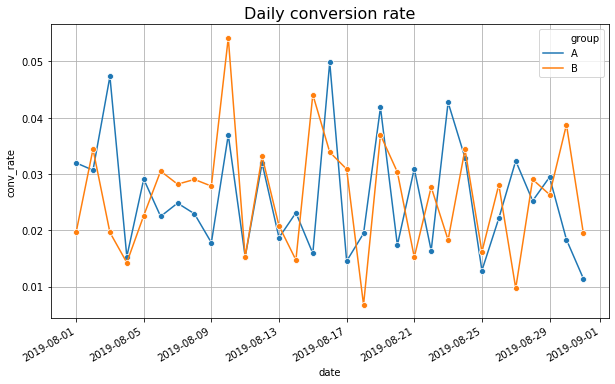

In [68]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Daily conversion rate',fontsize=16)
# plt.xticks(rotation=90)
plt.ylabel('Daily conversion rate')
sns.lineplot(x="date", y="conv_rate", hue="group", data=dayly_orders, marker="o",ax=ax)
fig.autofmt_xdate()
plt.grid()

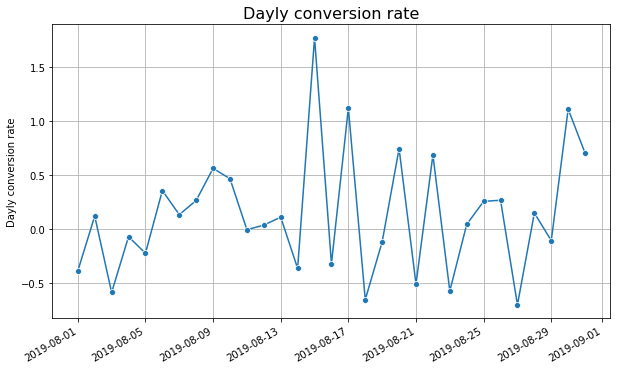

In [69]:
#now let's plot conversion rate for group B in relation to A
df = dayly_orders.pivot_table(columns='group',values='conv_rate', index='date').apply(lambda x: x['B'] / x['A'] - 1, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Dayly conversion rate',fontsize=16)
plt.ylabel('Dayly conversion rate')
sns.lineplot(data=df, marker="o",ax=ax)
fig.autofmt_xdate()
plt.grid()

Now let's look at cumulative conversion.

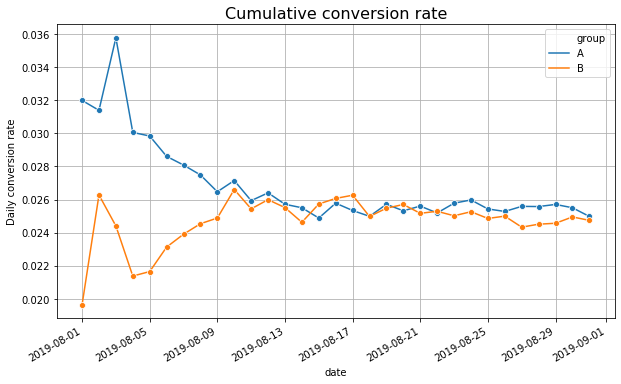

In [70]:
cumulativedata['conv_rate'] = cumulativedata.orders / cumulativedata.visits
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Cumulative conversion rate',fontsize=16)
sns.lineplot(x="date", y="conv_rate", hue="group", data=cumulativedata, marker="o",ax=ax)
plt.ylabel('Daily conversion rate')
fig.autofmt_xdate()
plt.grid()

We see that in the begining of the research data for conversion was not stable, but then it has stabilised and got to somewhat simillar values for both group. Let's check relative values for group B in relation to group A.

In [71]:
cumulative_conversion = (cumulativedata
                        .pivot_table(index='date', columns='group',values='conv_rate')
                        .reset_index()
                       )
cumulative_conversion.columns = ['date', 'conversionA', 'conversionB']
cumulative_conversion.head()

,date,conversionA,conversionB
0,2019-08-01,0.031989,0.019635
1,2019-08-02,0.031390,0.026275
2,2019-08-03,0.035772,0.024404
3,2019-08-04,0.030055,0.021376
4,2019-08-05,0.029837,0.021646


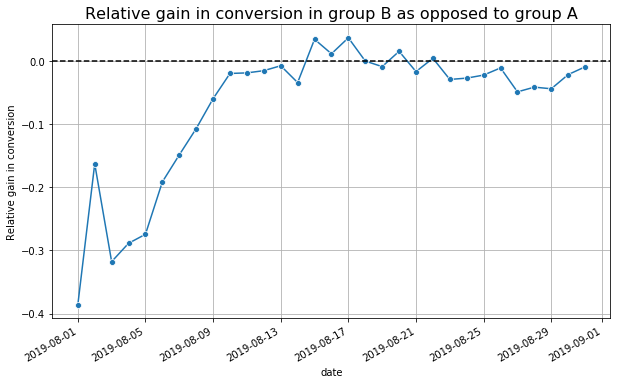

In [72]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Relative gain in conversion in group B as opposed to group A',fontsize=16)
plt.ylabel('Relative gain in conversion')
fig.autofmt_xdate()
sns.lineplot(x="date", y=(cumulative_conversion['conversionB'] / cumulative_conversion['conversionA'] -1),
             data=cumulative_conversion, marker="o", ax=ax)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()

From here I see that group B had smaller conversion than group A through most of the month. We see that at the begining the difference was higher, but then it stabilized and stayed a little bit lower than conversion of group A. 

### Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.


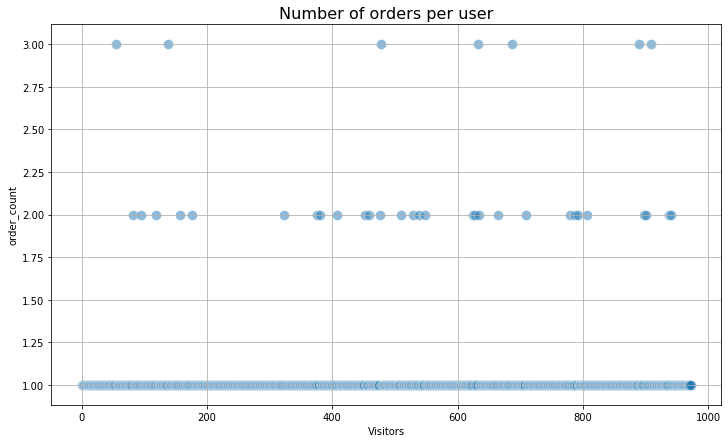

In [81]:
df = orders.groupby(['visitorId']).agg(order_count=('transactionId','nunique'),group=('group','max')).reset_index()
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Number of orders per user',fontsize=16)
plt.grid()
sns.relplot(x=range(0, len(df['visitorId'])), y="order_count", data=df, ax=ax, s=100, alpha=0.5)
ax.set_xlabel('Visitors')
plt.close(2)


Most of users have made 1 order in a month, there were some who've done 2 and even fewer who have done 3. Let' check now which data can we consider an anomaly.

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [74]:
np.percentile(df['order_count'], [95, 99])

array([1., 2.])

We see that 95% of users have made on order and 99% of users have made not more than 2 orders, therefore I'll consider people who have done 3 or more (in our case only 3) an anomaly.

### Plot a scatter chart of order prices. Make conclusions and conjectures.

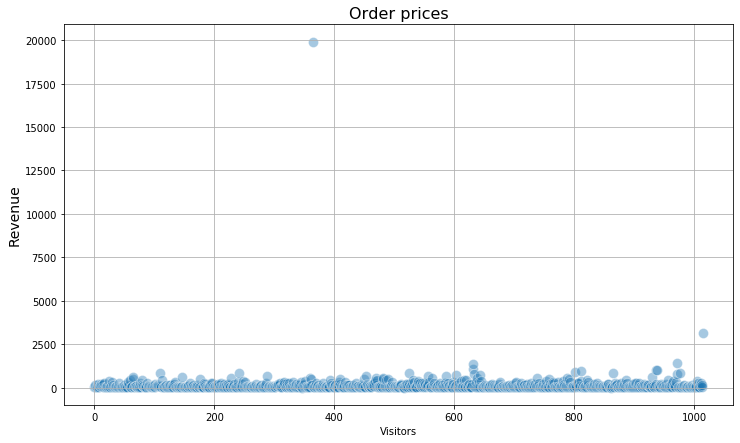

In [83]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Order prices',fontsize=16)
plt.grid()
sns.scatterplot(x=range(0, len(orders['transactionId'])), y="revenue", data=orders, ax=ax, s=100, alpha=0.4)
plt.ylabel('Revenue',fontsize=14)
ax.set_xlabel('Visitors')
plt.close(2)



Looks like there are some serious outliers. Let's look at the data using log scale for y axis. Let's also add group as hue.

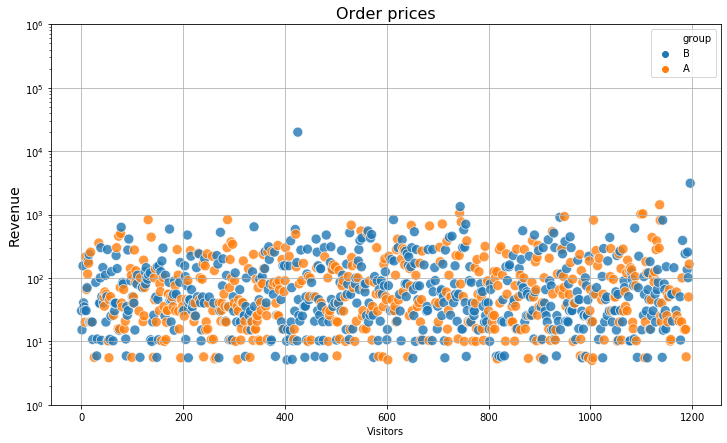

In [80]:
df = orders.reset_index()
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Order prices',fontsize=16)
plt.yscale('log')
plt.ylim(1,1000000)
sns.scatterplot(x='index', y="revenue", data=df, hue='group',ax=ax, s=100, alpha=0.8)
plt.ylabel('Revenue',fontsize=14)
ax.set_xlabel('Visitors')

plt.grid()

So I see that most of orders were from 5 dollars up to a hundreed. There are really few orders that went above a thousand dollars. Also there are some very high valued orders: one was for something like 5000 and one was worth more than 20000! I think that he's the one who was the reason for that raise of relative order size for group B. These're definitely outliers! Let's see percentiles.

#### Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.


In [77]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

As I have said most of our orders have been worth less than a thousand bucks. So I think that we can consider everything that's worth more than 900 to be an outlier. 

### Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.


It's important to notice that we have here really small amount of samples of data. Therefore out test won't be percise enough. Let's first check the distribution of the data here to choose the right way to find statistical significance.

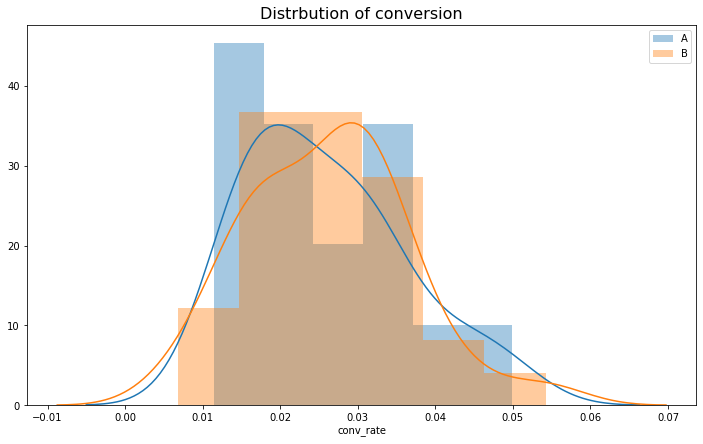

In [78]:
fig, ax = plt.subplots(figsize=(12, 7))
ax.set_title('Distrbution of conversion',fontsize=16)

sns.distplot(dayly_orders.query('group=="A"').conv_rate, ax=ax, label="A", bins='auto')
sns.distplot(dayly_orders.query('group=="B"').conv_rate, ax=ax, label="B")
plt.legend()

So I think that I will be using here Mann-Whitney Test because out data is not non-parametric (not normally distributed).

In [79]:
#create samples with values for group A and group B
sample_a = dayly_orders.query('group=="A"').conv_rate
sample_b = dayly_orders.query('group=="B"').conv_rate
alpha = .05 
print("P-value: {0:.10f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Significance level:', alpha)
print ("Relative conversion gain for group B in relation to group A: {:.3f}".format(sample_b.mean()/sample_a.mean()-1))


P-value: 0.4329199476
Significance level: 0.05
Relative conversion gain for group B in relation to group A: 0.010


P-value is much smaller than significance level, therefore we reject the theory that these samples are same. <b> There isn't a significant diffference in convertion between two groups.</b> And as we can see conversion there is only 0.5% relative conversion gain for group B.

P-value is much bigger than significance level, therefore we reject the theory that these samples are same. <b> There isn't a significant diffference in convertion between two groups.</b> And as we can see conversion there is only 0.5% relative conversion gain for group B.

### Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.


In [40]:
sample_a=orders_[orders_['group']=="A"]['revenue']
sample_b=orders_[orders_['group']=="B"]['revenue']
alpha = .05 
print("P-value: {0:.10f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Significance level:', alpha)
print ("Relative gain in order size for group B in relation to group A: {:.3f}".format(sample_b.mean()/sample_a.mean()-1))


P-value: 0.3389087497
Significance level: 0.05
Relative gain in order size for group B in relation to group A: 0.337


P-value is higher than significance level, therefore we can't reject the theory that these samples are same. <b> There <u>isn't</u> a significant diffference in average order size between two groups.</b> But there's also some gain in order size for group B. (It may change a little depending on the size of sample of data that is taken from group B).

### Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.


First let's find amount of users that we can consider outliers and make a list of them. Based on previous analysis thethe are users who have made 3 orders or more and users who have spend more than 1000$.

In [52]:
users_many_orders = (orders
                     .groupby('visitorId')
                     .agg({'transactionId':'nunique'})
                     .query('transactionId >=3')
                     .reset_index()
                     .visitorId
                    )
users_expensive_orders = (orders.query('revenue > 900').revenue)
abnormal_users = pd.concat([users_many_orders,users_expensive_orders], axis=0).drop_duplicates()
print(abnormal_users.head())
print(abnormal_users.shape[0])

0    2.498647e+08
1    6.110592e+08
2    2.108163e+09
3    2.742574e+09
4    2.988191e+09
dtype: float64
16


Now let's make samples for finding statistical significance.

In [53]:
dayly_orders_filtered = (orders_
                .query('visitorId not in @abnormal_users') #get rid of anomalies
                .groupby(['date','group'])
                .agg({'transactionId':'nunique','visitorId':'nunique', 'revenue':'sum'})
                .reset_index()
                .sort_values(by=['date','group'])
               )
dayly_orders_filtered = dayly_orders_filtered.merge(visits, left_on=['date', 'group'], right_on=['date', 'group'])
dayly_orders_filtered.columns = ['date','group','orders','buyers','revenue','visits']
dayly_orders_filtered['conv_rate'] = dayly_orders_filtered.orders / dayly_orders_filtered.visits

#create samples with values for group A and group B
sample_a = dayly_orders_filtered.query('group=="A"').conv_rate
sample_b = dayly_orders_filtered.query('group=="B"').conv_rate
alpha = .05 
print("P-value: {0:.10f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Significance level:', alpha)
print ("Relative conversion gain for group B in relation to group A: {:.3f}".format(sample_b.mean()/sample_a.mean()-1))

P-value: 0.3467148387
Significance level: 0.05
Relative conversion gain for group B in relation to group A: 0.026


There ism't much change in P-value here, it has actually decreased with filtered data. So I can safely say that <b> there isn't any real significant difference between conversion </b>. We can see that in relative values there is a gain in conversion for group B, but it isn't statistically significant.

### Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.


In [54]:
sample_a=orders_.query('visitorId not in @abnormal_users and group =="A"' ).revenue
sample_b=orders_.query('visitorId not in @abnormal_users and group =="B"' ).revenue
alpha = .05 
print("P-value: {0:.10f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))
print('Significance level:', alpha)
print ("Relative gain in order size for group B in relation to group A: {:.3f}".format(sample_b.mean()/sample_a.mean()-1))


P-value: 0.4090229093
Significance level: 0.05
Relative gain in order size for group B in relation to group A: 0.336


Even with filtered data P-value is much higher than significance level, therefore we can't reject the theory that these samples are same. <b> There <u>isn't</u> a significant diffference in average order size between two groups.</b> Despite the fact that there's some gain in order size for group B, we can't consider it to be statistically significant. 

# Conclusion

After performing this analysis and A/B testing of the resulting data that there are several conclusions that can be made:
1. There isn't a statistically significant difference in conversion between the groups, according to both the raw and the filtered data.
2. Both the raw data and filtered data didn't show a statistically significant difference between the groups in terms of average order size. 

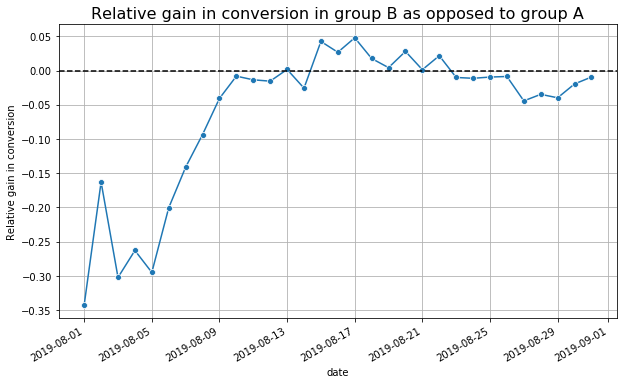

In [60]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Relative gain in conversion in group B as opposed to group A',fontsize=16)
plt.ylabel('Relative gain in conversion')
fig.autofmt_xdate()
sns.lineplot(x="date", y=(cumulative_conversion['conversionB'] / cumulative_conversion['conversionA'] -1),
             data=cumulative_conversion, marker="o", ax=ax)
plt.axhline(y=0, color='black', linestyle='--')
plt.grid()

3. When we look at relative gain of conversion for group B opposed to group A we don't see that there is any conversion gain that may show us that there is any reason to continue test.
4. Based on previous conclusion I see that there is no reason to continue this test, because there is no significant difference between the groups. Therefore I recomend <b> to stop the test </b> and try other methods to increase conversion and order size.